# Equações não-lineares de uma variável

Tanto o método da bisseção quanto o método do ponto fixo, vistos na semana passada, são simples e rápidos, porém eficientes o bastante para resolver uma boa parte das equações não-lineares encontradas por aí. Agora, vamos ver um outro método, que cobre alguns dos problemas dos anteriores, porém com suas próprias desvantagens em particular. A mensagem aqui é que há vários métodos, cada um com suas particularidades. Alguns convergem para a solução de certas equções e não para outras, é importante ter um leque de alternativas para experimentar ao buscar uma solução. 

## Método de Newton–Raphson

O método de Newton–Raphson, ou simplesmente método de Newton, é um caso particular e otimizado do método do ponto fixo. Para uma derivação analítica detalhada, veja a [seção 3.4 do livro Cálculo Numérico](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/sdeduv-metodo_de_newton-raphson.html) do REAMAT/UFRGS.

A interpretação geométrica é mais fácil de entender. Para o método de Newton, vamos buscar a solução de uma equação na forma $f(x) = 0$, portanto desejamos encontrar uma raíz $x^*$ desta função. Dada uma tentativa de solução $x^{(1)}$, vamos obter aproximações $x^{(2)}$, $x^{(3)}$, etc., de forma iterativa, como nos métodos anteriores. A forma como calculamos a aproximação seguinte é descrita pela figura abaixo. 

*[CC BY-SA Pedro H A Konzen](https://github.com/reamat/CalculoNumerico/blob/master/cap_equacao1d/pics/metodo_de_Newton/metodo_de_Newton.py)*

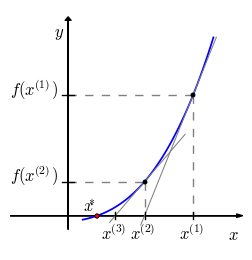

A curva azul representa a função $f(x)$. Começamos pelo valor $x^{(1)}$, e então traçamos uma linha tangente à curva neste ponto, em $f(x^{(1)})$. Esta linha cruza o eixo $x$ no ponto $x^{(2)}$, que passa a ser a próxima tentativa. Sim, é só isso. O que segue é apenas como operacionalizar este procedimento.

A inclinação desta linha tangente à curva, isto é, a tangente do ângulo $\theta$ da linha em relação ao eito $x$, é a derivada da própria função no ponto $x^{(1)}$, $f^\prime(x^{(1)})$. Da trigonometria,

$$
\tan \theta = \frac{\Delta y}{\Delta x} = \frac{f(x^{(1)}) - 0}{x^{(1)} - x^{(2)}} = f^\prime(x^{(1)}).
$$

Queremos encontrar $x^{(2)}$ dado $x^{(1)}$, logo, isolando $x^{(2)}$,

\begin{align}
\left(x^{(1)} - x^{(2)} \right)\ f^\prime(x^{(1)}) &= f(x^{(1)}) \\
x^{(1)} f^\prime(x^{(1)}) - x^{(2)} f^\prime(x^{(1)}) &= f(x^{(1)}) \\
x^{(2)} f^\prime(x^{(1)}) &= x^{(1)} f^\prime(x^{(1)}) - f(x^{(1)}) \\
x^{(2)} &= \frac{x^{(1)} f^\prime(x^{(1)})}{ f^\prime(x^{(1)})} - \frac{f(x^{(1)})}{ f^\prime(x^{(1)})} \\
x^{(2)} &= x^{(1)} - \frac{f(x^{(1)})}{ f^\prime(x^{(1)})}.
\end{align}

Ou seja, a aproximação seguinte depende apenas da posiçõ anterior, temos uma regra de recorrência. Generalizando para o $n$-ésimo passo,

$$
x^{(n+1)} = x^{(n)} - \frac{f(x^{(n)})}{ f^\prime(x^{(n)})}.
$$

Aqui aparece a primeira desvantagem: é preciso conhecer a derivada da função, $f^\prime(x)$. Se conhecemos a derivada, tomamos um valor inicial e usamos a fórmula de recorrência acima repetidamente para ter estimativas cada vez melhores da raiz $x^*$. O método de Newton converge, geralmente, para uma raiz próxima do ponto inicial, de modo que podemos encontrar as diferentes raízes de uma dada função apenas escolhendo o ponto inicial adequado.

Podemos seguir iterando até que a distância entre $x^{(n)}$ subsequentes seja menor do que uma tolerância, como fizemos nos outros métodos. Por outro lado, é preciso saber como associar o erro na aproximação da raiz com esta distância entre os pontos. Para isso, vamos avaliar como a convergência evolui analisando uma expansão de Taylor da função $f(x)$ próximo ao ponto $x^{(n)}$. Isto é,

$$
f(x) = f(x^{(n)}) + \left(x - x^{(n)} \right) f^\prime(x^{(n)}) + \frac{1}{2} \left(x - x^{(n)}\right)^2 f^{\prime\prime}(x^{(n)}) + \ldots
$$

Em $x = x^*$, temos que $f(x^*) = 0$, logo, a equação acima fica

\begin{align}
f(x^*) &= f(x^{(n)}) + \left(x^* - x^{(n)} \right) f^\prime(x^{(n)}) + \frac{1}{2} \left(x^* - x^{(n)}\right)^2 f^{\prime\prime}(x^{(n)}) + \ldots \\
&= f(x^{(n)}) + \left(x^* - x^{(n)} \right) f^\prime(x^{(n)}) + \frac{1}{2} \left(x^* - x^{(n)}\right)^2 f^{\prime\prime}(x^{(n)}) + \ldots \\
&= 0.
\end{align}

Dividindo tudo por $f^\prime(x^{(n)})$, e isolando $x^*$,

$$
\frac{f(x^{(n)})}{f^\prime(x^{(n)})} + \left(x^* - x^{(n)} \right) + \frac{1}{2} \left(x^* - x^{(n)}\right)^2 \frac{f^{\prime\prime}(x^{(n)})}{f^\prime(x^{(n)})} + \ldots = 0
$$
$$
x^* = x^{(n)} - \frac{f(x^{(n)})}{f^\prime(x^{(n)})} - \frac{f^{\prime\prime}(x^{(n)})}{2f^\prime(x^{(n)})} \left(x^* - x^{(n)}\right)^2 + \ldots
$$

Veja que os primeiros dois termos à direita são iguais à formula de recorrência para $x^{(n+1)}$. Também, vamos defirnir o erro na estimativa da raiz como a distância do ponto $x^{(n)}$ até a raiz verdadeira $x^*$, isto é

$$
\epsilon^{(n)} = x^* - x^{(n)}.
$$

Fazendo $x^* = \epsilon^{(n+1)} + x^{(n+1)}$, e $\left(x^* - x^{(n)}\right) = \epsilon^{(n)}$, ficamos com

\begin{align}
\epsilon^{(n+1)} + x^{(n+1)} &= x^{(n+1)} - \frac{f^{\prime\prime}(x^{(n)})}{2f^\prime(x^{(n)})} \left(\epsilon^{(n)}\right)^2 + \ldots \\
\implies \epsilon^{(n+1)} &= - \frac{f^{\prime\prime}(x^{(n)})}{2f^\prime(x^{(n)})} \left(\epsilon^{(n)}\right)^2 + \ldots
\end{align}

Isto significa que se erro é $\epsilon$ em um certo passo, ele será proporcional a $\epsilon^2$ no passo seguinte! Dizemos então que o método de Newton tem convergência quadrática. Admitindo que a quantidade $\frac{f^{\prime\prime}(x^{(n)})}{2f^\prime(x^{(n)})}$ é praticamente constante próximo à raiz, e descartando termos de ordem maior, podemos dizer que

\begin{align}
\epsilon^{(n+1)} &= c \left(\epsilon^{(n)}\right)^2 = \frac{1}{c} \left(c \epsilon^{(n)}\right)^2\\ 
&= \frac{1}{c} \left( \left(c \epsilon^{(n-1)}\right)^2 \right)^2 = \frac{1}{c} \left(c \epsilon^{(n-1)}\right)^{2 \cdot 1} = \frac{1}{c} \left(c \epsilon^{(n-1)}\right)^{2^2} \\
&= \frac{1}{c} \left(c \epsilon^{(n-2)}\right)^{2 \cdot 2 \cdot 2} = \frac{1}{c} \left(c \epsilon^{(n-2)}\right)^{2^3} \\
&= \frac{1}{c} \left(c \epsilon^{(n - k + 1)}\right)^{2^k}.
\end{align}

Repetindo até que $k = n$, temos

$$
\epsilon^{(n+1)} = \frac{1}{c} \left(c \epsilon^{(1)}\right)^{2^n},
$$

onde $\epsilon^{(1)}$ é o erro na tentativa inicial. Em outras palavras, o erro final varia com $n$ de forma exponencial de uma exponencial, realmente rápido. 

Na prática, podemos ter uma estimativa do erro sabendo que

\begin{align}
x^* &= x^{(n)} + \epsilon^{(n)} \\
x^* &= x^{(n+1)} + \epsilon^{(n+1)} = x^{(n+1)} + c \left( \epsilon^{(n)} \right)^2.
\end{align}

Calculando a diferença entre as duas equações, temos que

\begin{align}
0 &= x^{(n)} + \epsilon^{(n)} - x^{(n+1)} - c \left( \epsilon^{(n)} \right)^2 \\
x^{(n+1)} - x^{(n)} &= \epsilon^{(n)} - c \left( \epsilon^{(n)} \right)^2 \\
&= \epsilon^{(n)} \left( 1 - c \epsilon^{(n)} \right) \\
\implies \epsilon^{(n)} &\approx x^{(n+1)} - x^{(n)} .
\end{align}

No último passo, fazemos a suposição de que  $c \epsilon^{(n)} \ll 1$. Ou seja, o método de Newton converge tão rapidamente, que o valor seguinte a um chute já é uma aproximação excelente da própria raiz.

Assim, uma boa forma de obter uma determinada tolerância $\epsilon$ é simplesmente ir iterando a equação

$$
x^{(n+1)} = x^{(n)} - \frac{f(x^{(n)})}{ f^\prime(x^{(n)})}
$$

até que a diferença entre posições sucessivas seja menor do que a tolerância desejada, isto é,

$$
\left| x^{(n+1)} - x^{(n)} \right| < \epsilon.
$$

### Exercício 1

Vamos usar o método de Newton para calcular a tangente hiperbólica inversa de um dado número $u$, tal que

$$
x = \mathrm{arctanh}\,u.
$$

Por definição, como $\mathrm{arctanh}$ é a função inversa de $\tanh$, temos

\begin{align}
u = \tanh x\\
\implies \tanh x - u = 0,
\end{align}

logo o valor da tangente hiperbólica inversa, $x$, é a raiz da equação $ f(x) = \tanh x - u = 0$. Isto é, para calcular o valor de $\mathrm{arctanh}\,u$ para um dado $u$, precisamos encontrar a raiz daquela equação.

**a.** Faça o gráfico desta função para 5 valores de $u$ entre $0$ e $1.2$. Experimente com o gráfico e veja para quais valores de $u$ a curva corta o eixo $x$. O que o que acontece com valores negativos de $u$?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

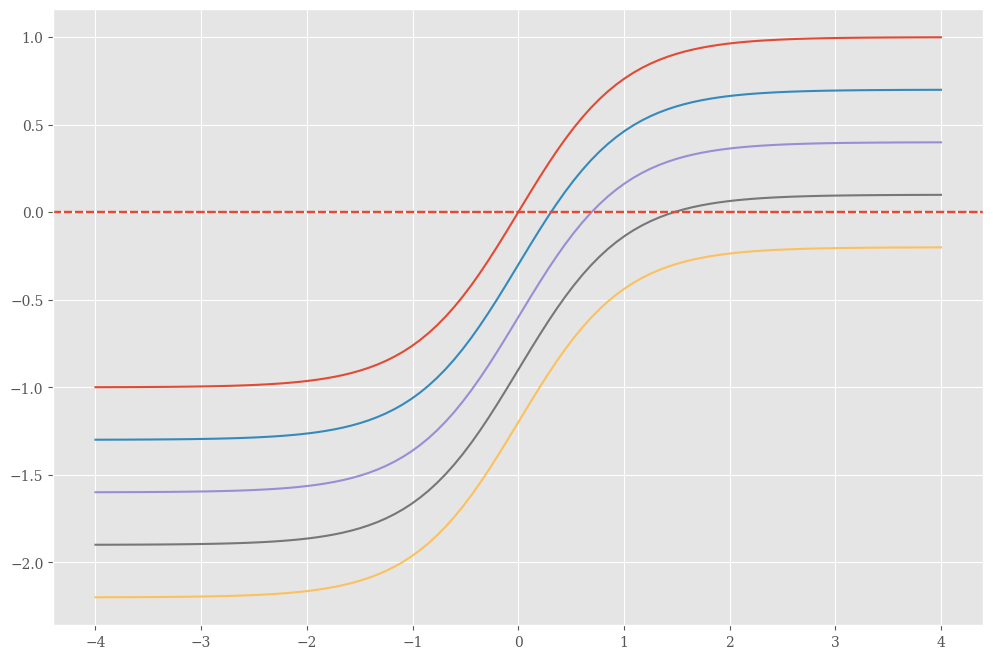

In [3]:
def f(u,x):
    return np.tanh(x) - u

x = np.linspace(-4,4,100)
u = np.linspace(0,1.2,5)

fig, ax =  plt.subplots(1,1,figsize = (12,8))
y = np.zeros(len(x))

for i in range(len(u)):
    
    for j in range(len(x)):
        
        y[j] = f(u[i],x[j])
    ax.plot(x,y)
    ax.axhline(0,0, ls = "--")

**b.** Para aplicar o método de Newton, precisamos calcular a derivada de $f(x)$. Neste caso,

$$
f^\prime(x) = \frac{1}{\cosh^2 x}.
$$

Calcule $\frac{f(x)}{f^\prime(x)}$ analiticamente. Para $u = 0.1$, escolha um valor inicial adequado (com base nos gráficos acima) e use o método de Newton para achar a solução, com uma tolerância de $\epsilon < 10^{-12}$. Compare a sua solução com o resultado da função `np.arctanh(0.1)`.

In [4]:
x1 = 0.0
u = 0.1

epsilon = 1e-12

for i in range(10):
    x2 = x1 - (np.tanh(x1)-u) * np.cosh(x1)**2
    delta = x2 - x1

    if np.abs(delta) < epsilon:

        break
    else:
        
        x1 = x2
        
print(x2)
print(np.arctanh(0.1))

0.1003353477310756
0.1003353477310756


**c.** Encapsule este código, isto é, defina sua própria função `arctan(u, epsilon=1e-12)`. Calcule `arctan(0.1)` para certificar-se de que a função está correta.

**d.** Faça o gráfico da tangente hiperbólica inversa. É fácil conhecer o domínio da função lembrando que a tangente hiperbólica gera valores no intervalo aberto $(-1, 1)$.

### Desvantagens

O método de Newton tem duas grandes desvantagens. A primeira é que precisamos saber a derivada da função, $f^\prime(x)$. Como veremos abaixo no método da secante, isso pode ser resolvido se calcularmos a derivada numericamente, efetivamente calculando a função em dois pontos próximos e aproximando a derivada pela tangente do ângulo.

O problema principal é que o método de Newton nem sempre converge. Algumas funções e pontos iniciais como visto abaixo podem impedir a convergência. Um valor muito pequeno de $f^\prime(x)$ como na figura (a) pode fazer com que o salto para o próximo passo seja muito grande, fazendo a posição ir para mais longe da raiz, com um erro maior do que o anterior. O algoritmo também pode ficar preso em vales como na figura (b), ou simplesmente ir para longe da raiz porque a derivada tem a inclinação errada.

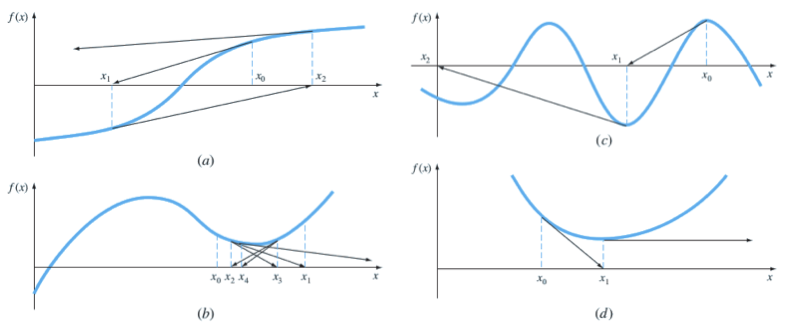

Erros como esses costumam ser fáceis de detectar. É sempre conveniente conferir a raiz encontrada, se de fato a função é zero neste valor, e visualizá-la no contexto do gráfico da função. E, caso este método não funcione, podemos sempre tentar outros, é provável que algum deles funcione.

## Método da secante

Como discutido acima, para usar o método de Newton, precisamos conhecer a derivada da função. Isto nem sempre é fácil (ou mesmo possível). Podemos adaptar o método de Newton, calculando a derivada da função de forma numérica, aproximada. Recordando, o métdo de Newton tem a regra de recorrência

$$
x^{(n+1)} = x^{(n)} - \frac{f(x^{(n)})}{ f^\prime(x^{(n)})}.
$$

Podemos calcular a derivada de forma aproximada usando a própria definição de derivada, isto é

$$
f^\prime(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x},
$$

com $\Delta x$ muito pequeno. Para evitar chamavas desnecessárias à função, vamos usar os próprios pontos $x^{(n)}$ que já foram calculados, visto que são muito próximos entre si depois de um punhado de passos. Neste caso,

$$
f^\prime(x^{(n)}) \approx \frac{f(x^{(n)}) - f(x^{(n-1)})}{x^{(n)} - x^{(n-1)}}.
$$

Com isso, temos

$$
x^{(n+1)} = x^{(n)} - f(x^{(n)}) \frac{x^{(n)} - x^{(n-1)}}{f(x^{(n)}) - f(x^{(n-1)})}.
$$

Graficamente, é como passar uma linha unindo os pontos $f(x^{(n)})$ e $f(x^{(n-1)})$, e tomando como $x^{(n+1)}$ o ponto onde esta reta corta o eixo $x$. A figura abaixo ilustra esta situação.

*[CC BY-SA Picknick](https://github.com/reamat/CalculoNumerico/blob/master/cap_equacao1d/pics/metodo_das_secantes/metodo_das_secantes.py)*

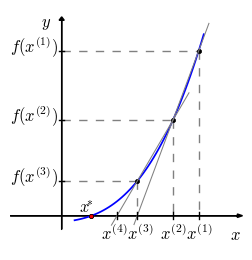

Veja que para calcular o próximo ponto, precisamos não somente do ponto atual, mas também do anterior. N prática, temos que guardar também o valor de $x^{(n-1)}$ a cada iteração (e talvez de $f(x^{(n-1)})$ para otimizar o código). De resto, este método tem as mesma características do método de Newton, com a mesma convergência rápida, e os mesmos problemas vistos acima.

## Exercício 2
 
Calcule as raízes da função abaixo usando o método das secantes.
 
$$
f(x) = 2x^3 - 11.7 x^2 + 17.7 x -5.
$$
 
**a.** Faça o gráfico de $f(x)$, determine quantas raízes existem, e aplique o método da secante para encontrá-las.

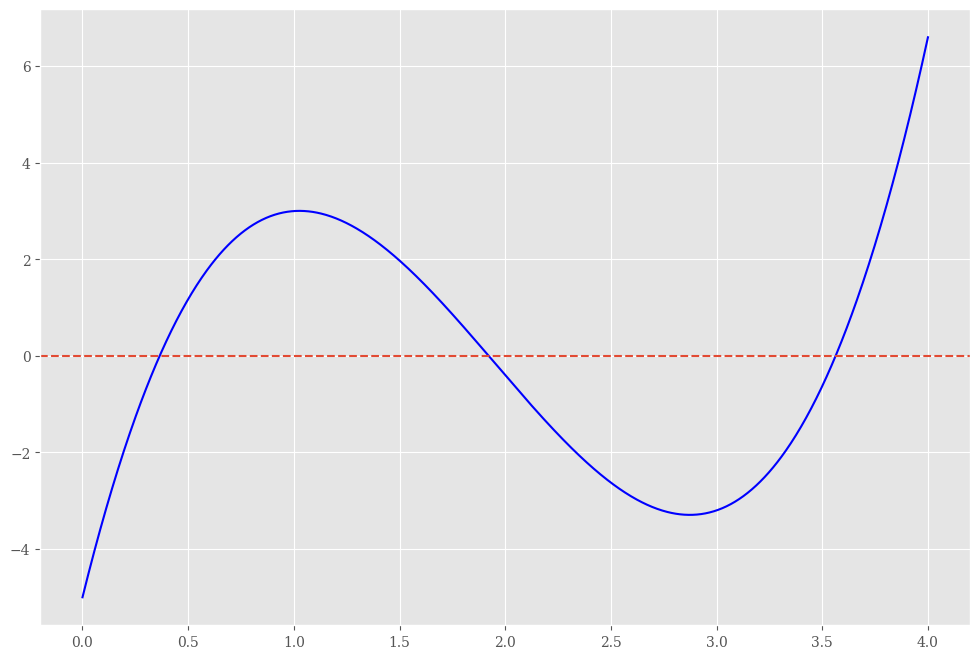

In [8]:
def f(x):
    return 2*x**3 - 11.7*x**2 + 17.7*x - 5

x = np.linspace(0,4,1000)

fig, ax = plt.subplots(1,1,figsize = (12,8))

ax.plot(x,f(x), color = "blue")
ax.axhline(0,0,ls="--")

**b.** Defina uma função para calcular uma raiz de $f(x)$, dados dois pontos iniciais. Em seguida, calcule todas as raízes.

In [10]:
def raizes(x1,x2):
    N = 10000
    epsilon = 1e-10
    
    for i in range(N):
        x3 = x2 - f(x2)*((x2-x1)/(f(x2)-f(x1)))

        delta = x3 - x2
        
        if np.abs(delta) < epsilon:
            break
        else:
            x1=x2
            x2=x3

    return x2
    
print(raizes(1.5,1.75))
print(raizes(0.7,0.75))
print()

1.921740931777975
0.3650982433531779


**c.** Verifique se as raízes estão corretas fazendo novamente o gráfico da função, anotando a posição das raízes, por exemplo, com linhas verticais.

Para desenhar uma linha vertical tracejada em $x=0.2$, faça `ax.axvline(0.2, ls='--')`.

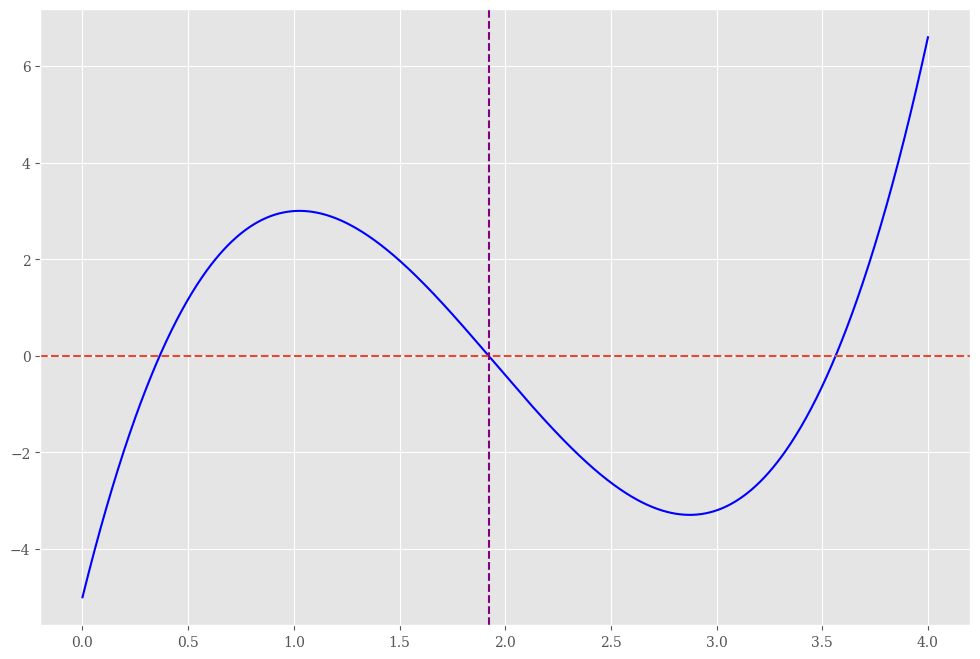

In [9]:
def f(x):
    return 2*x**3 - 11.7*x**2 + 17.7*x - 5

x = np.linspace(0,4,1000)

fig, ax = plt.subplots(1,1,figsize = (12,8))

ax.plot(x,f(x), color = "blue")
ax.axhline(0,0,ls="--")
ax.axvline(1.921740931777975,ls="--",color="purple")

## Conclusão

Vimos alguns métodos que parecem bastante simples, mas que são efetivos para encontrar a solução numérica de equações não-lineares de uma variável. Não existe solução mágica, cada método tem seus prós e contras, e é importante saber as suas limitações. Mais importante ainda, é preciso conferir se a solução encontrada é válida, ou se o algoritmo escolhido convergiu para a solução desejada.